In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl,plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [3]:
def gen_paths(S0,r,sigma,T,M,I):
    dt=T/M
    paths=np.zeros((M+1,I))
    paths[0]=S0
    for t in range(1,M+1):
        rand=np.random.standard_normal(I)
        rand=(rand-rand.mean())/rand.std()
        paths[t]=paths[t-1]*np.exp((r-0.5*sigma**2)*dt+
                                   sigma*math.sqrt(dt)*rand)
    return paths
S0=100
r=0.05
sigma=0.2
T=1.0
M=50
I=2500
np.random.seed(100)
paths=gen_paths(S0,r,sigma,T,M,I)
paths[-1].mean()

105.03512508313865

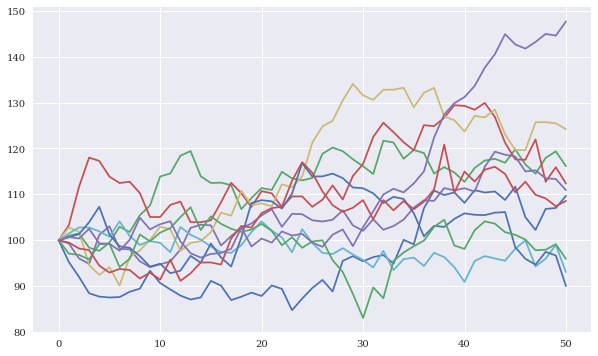

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:,:10])

In [9]:
def print_stats(arr):
    sta = scs.describe(arr)
    print('size: ',sta[0])
    print('min, max: ',sta[1][0],sta[1][1])
    print('mean: ',sta[2])
    print('std: ',sta[3])
    print('skew: ',sta[4])
    print('kurtosis: ',sta[5])
print_stats(paths[2])

size:  2500
min, max:  87.82348506141093 114.39040397653189
mean:  100.19627480795863
std:  15.308680925964486
skew:  0.15766091779497446
kurtosis:  0.16813088694666734


In [11]:
def log_returns(arr):
    return np.log(arr[1:]/arr[:-1])
log_returns(paths[1]).mean()

1.7870374168411268e-05

In [12]:
def normality_test(arr):
    print('skewness: ',scs.skew(arr))
    print('skewness-test p-value: ',scs.skewtest(arr)[1])
    print('kurtosis: ',scs.kurtosis(arr))
    print('skewness-test p-value: ',scs.kurtosistest(arr)[1])
    print('norm-test p-value: ',scs.normaltest(arr)[1])
normality_test(paths[3])

skewness:  0.20119975276260219
skewness-test p-value:  4.523555309110898e-05
kurtosis:  0.10493856779823041
skewness-test p-value:  0.2732100547463314
norm-test p-value:  0.00013378453969367462


In [13]:
normality_test(log_returns(paths[3]))

skewness:  0.0241593107675173
skewness-test p-value:  0.6209891754228758
kurtosis:  -0.09087816578890306
skewness-test p-value:  0.3668187534412387
norm-test p-value:  0.5889309316167879


[*********************100%***********************]  3 of 3 completed
Normality test for  AAPL from  2021-01-01  to  2021-12-31
skewness:  -0.1328397024760657
skewness-test p-value:  0.3799413161198578
kurtosis:  0.35750161556416327
skewness-test p-value:  0.2114602189099034
norm-test p-value:  0.31156529781706027
Normality test for  MSFT from  2021-01-01  to  2021-12-31
skewness:  -0.07337165328989094
skewness-test p-value:  0.6267552485686314
kurtosis:  0.36206752599335124
skewness-test p-value:  0.2073281657329833
norm-test p-value:  0.40122367814195353
Normality test for  AMZN from  2021-01-01  to  2021-12-31
skewness:  -0.4199501057172143
skewness-test p-value:  0.0072536836810477455
kurtosis:  2.7047987111211977
skewness-test p-value:  5.716847535751249e-06
norm-test p-value:  9.236858252258939e-07


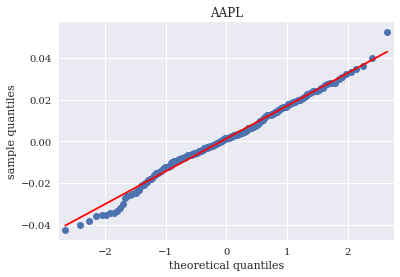

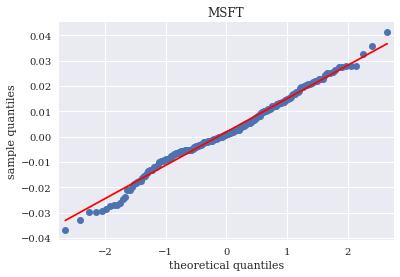

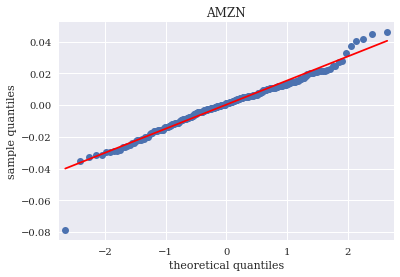

In [23]:
import yfinance as yf
def stock_data(tickers,s,e):
    full_df=yf.download(tickers,s,e)
    price_df=full_df['Adj Close']
    log_return=np.log(price_df/price_df.shift(1))
    log_return.dropna(inplace=True)
    for ticker in tickers:
        arr=log_return[ticker].values
        print('Normality test for ',ticker,'from ',s,' to ',e)
        normality_test(arr)
        sm.qqplot(log_return[ticker], line='s')
        plt.title(ticker)
        plt.xlabel('theoretical quantiles')
        plt.ylabel('sample quantiles');
stock_data(['AAPL','MSFT','AMZN'],'2021-01-01','2021-12-31')